In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('diabetes.csv') #here the data set is loaded into a dataframe

## Understanding the data: 

In [3]:
#First- Visualisation of columns:

df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [4]:
df.shape

(520, 17)

In [5]:
#Pre-Processing data 
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df.describe() #Properties of age column

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [7]:
#Whether the data has a null value: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
df.isnull().sum() #Here I am checking if there are any null values for the columns. As we can see there are no null values 

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## Exploratory Data Analysis

In [9]:
#Just checking most frequent categorical state in 'gender'

df['Gender'].mode()[0]

'Male'

In [10]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

<AxesSubplot:>

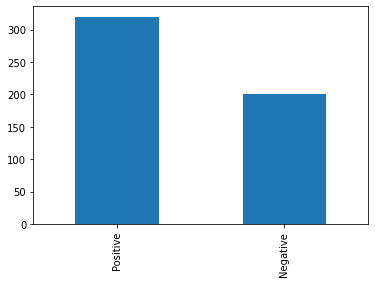

In [11]:
df['class'].value_counts().plot.bar() #Number of positive cases versus number of negative cases

<AxesSubplot:>

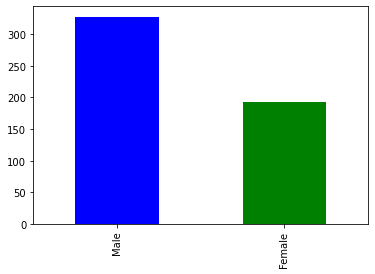

In [12]:
df['Gender'].value_counts().plot(kind='bar', color=['b','g'])

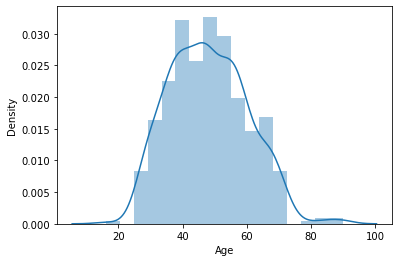

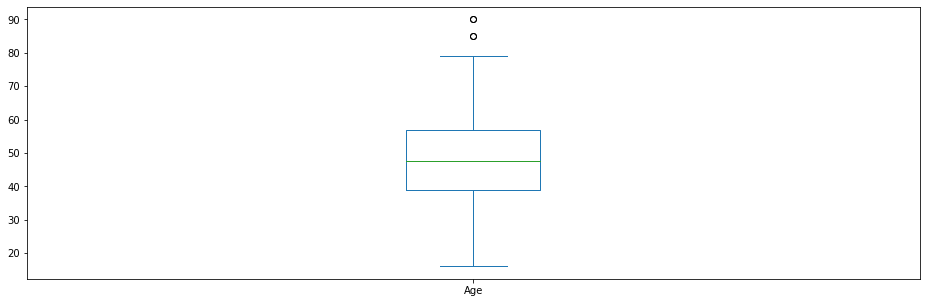

In [13]:
sns.distplot(df['Age']) # Similarly, we can visualise the distribution of the numerical variables
plt.show()
df['Age'].plot.box(figsize=(16,5))
plt.show()
#This code is to visualise the age distribution


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
cols=['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia','Genital thrush', 'visual blurring','Itching','Irritability','delayed healing','partial paresis', 'muscle stiffness','Alopecia','Obesity','class']
le=LabelEncoder()
for col in cols:
    for col in cols:
        df[col]= le.fit_transform(df[col])

#We need to do this because we want binary values - converting categorical values into integer values 

In [16]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

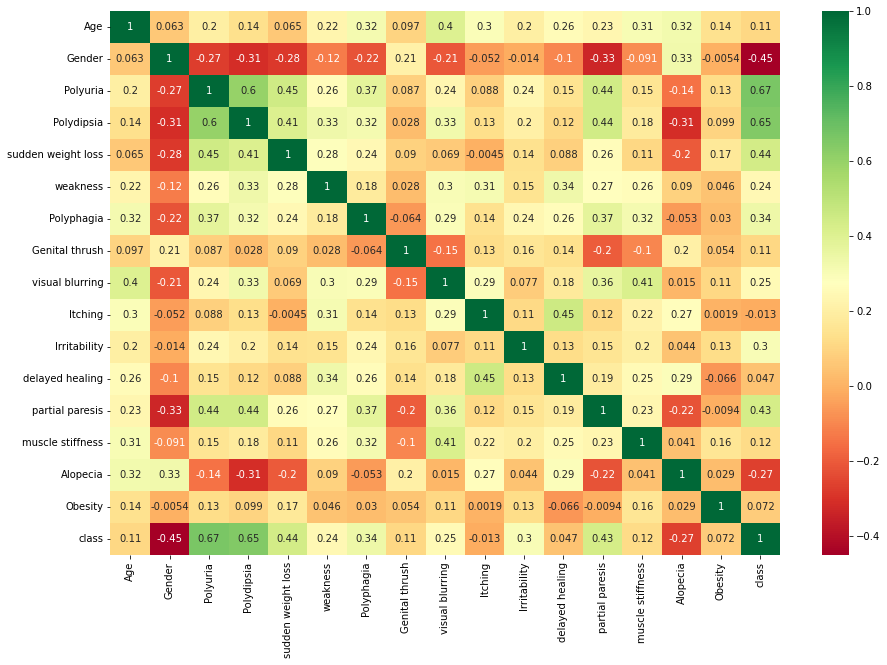

In [17]:
#Now I applied a correlation matrix to analyse relationships between the different attributes
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="RdYlGn")

In [18]:
#Here we can drop the 3 most correlated features: 
cols =['Polyuria', 'Polydipsia', 'sudden weight loss', 'partial paresis']
df = df.drop(columns=cols,axis=1)

In [19]:
X= df.drop(['class'],axis=1)
y=df['class']


## Machine Learning Prediction Method

In [20]:
#First we need to perform cross-validation in the dataset 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
#I create a model that can be used with different machine learning algorithms
def classify(model,x,y):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is:', model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print('Cross Validation Accuracy:', np.mean(score)*100)


In [23]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
LG_model= LogisticRegression()
classify(LG_model,X,y)

Accuracy is: 85.8974358974359
Cross Validation Accuracy: 81.53846153846153


In [24]:
#K-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
classify(knn_model,X,y)

Accuracy is: 82.05128205128204
Cross Validation Accuracy: 83.07692307692307
